In [237]:
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
# from qiskit import transpile

# from qiskit.quantum_info import Operator, Statevector, DensityMatrix, random_statevector

from qiskit.visualization import plot_distribution, plot_bloch_multivector
# from qiskit.visualization import array_to_latex
# from qiskit.visualization import plot_state_city

from qiskit_aer import AerSimulator

In [238]:
# Define a simple function f(x)
def f(x):
    return x % 2  # Example: f(x) = x mod 2

In [239]:
# Create a quantum circuit with 3 qubits and 1 ancillary qubit for function evaluation
n_qubits = 4
oracle_qubits = n_qubits + 1

# Create the quantum circuit
qc = QuantumCircuit(oracle_qubits)

# Apply Hadamard gate to input qubits
qc.h(range(n_qubits))

In [240]:
# Define the oracle as a separate circuit
oracle = QuantumCircuit(oracle_qubits, name="    U_f(x)   ")
oracle.cx(0, n_qubits)  # The LSB (qubit 0) determines f(x)

In [241]:
# Append the oracle as a black-box circuit
qc.append(oracle.to_instruction(), range(oracle_qubits))

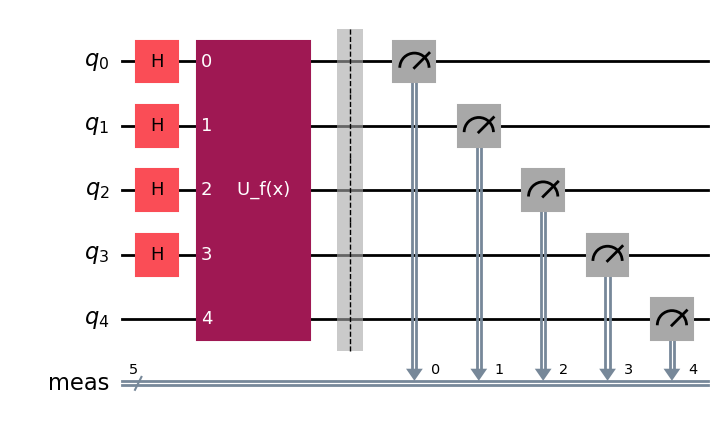

In [242]:
# Measure all qubits
qc.measure_all()

# Draw the circuit
qc.draw('mpl')


In [243]:
# Increase shots to reduce sampling variance
shots = 10000

In [244]:
# Simulate the circuit
simulator = AerSimulator()
result = simulator.run(qc.decompose(reps=1), shots= shots).result()
counts = result.get_counts()

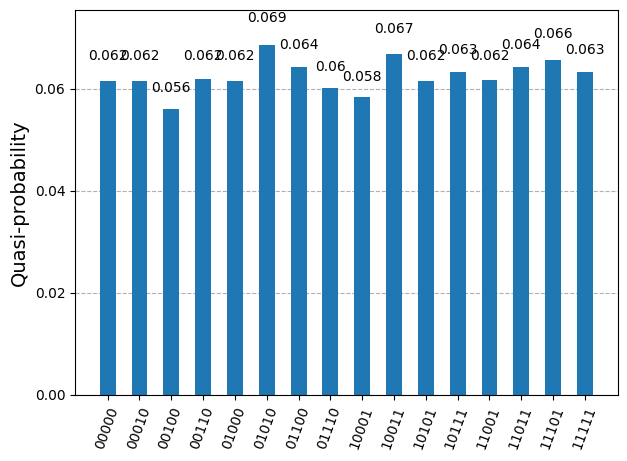

In [245]:
# Display the result
plot_distribution(counts)